In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dataset = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = dataset.load_data(num_words = 10000)

In [26]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [27]:
loss = ['mean_squared_error', 'mean_absolute_error', 'binary_crossentropy']
val_results = []
for i in loss:
    model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                                 keras.layers.Dense(16, activation='relu'), 
                                 keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='sgd', loss=i, metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=128, validation_data = (x_val, y_val))
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    val_results.append(val_acc_values)



Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5240 - loss: 0.2496 - val_accuracy: 0.5345 - val_loss: 0.2494
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5454 - loss: 0.2491 - val_accuracy: 0.5652 - val_loss: 0.2486
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5830 - loss: 0.2481 - val_accuracy: 0.6093 - val_loss: 0.2470
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6305 - loss: 0.2461 - val_accuracy: 0.6469 - val_loss: 0.2443
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.2432 - val_accuracy: 0.6999 - val_loss: 0.2406
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.2389 - val_accuracy: 0.7288 - val_loss: 0.2360
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7417 - loss: 0.2339 - val_accuracy: 0.7501 - val_loss: 0.2306
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.2281 - val_accuracy: 0.

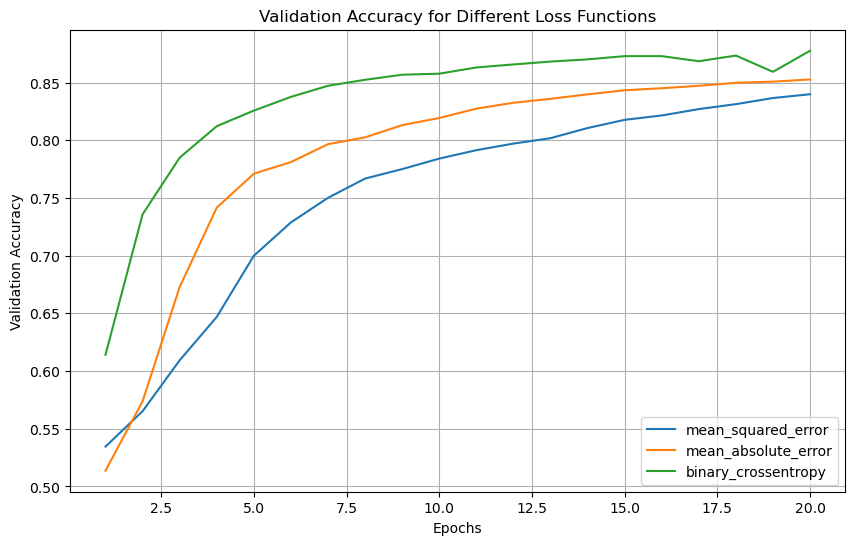

The highest validation accuracy on last epoch is: binary_crossentropy


In [28]:
epochs = range(1, 21)  
plt.figure(figsize=(10, 6))
result = []

for i, loss_function in enumerate(loss):
    plt.plot(epochs, val_results[i], label=loss_function)
    result.append((loss_function, val_results[i][-1]))
plt.title('Validation Accuracy for Different Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
print(f'The highest validation accuracy on last epoch is: {max(result, key = lambda k: k[1])[0]}')

In [29]:
# here I will use the binary cross entropy loss function because it performed the best in previous experiment
# we want to compare the different batch sizes
batch_sizes = [16, 32, 64, 128, 256, 512]
val_results = []
for i in batch_sizes:
    model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                                 keras.layers.Dense(16, activation='relu'), 
                                 keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=i, validation_data = (x_val, y_val))
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    val_results.append(val_acc_values)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6631 - loss: 0.6231 - val_accuracy: 0.8414 - val_loss: 0.3843
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8641 - loss: 0.3354 - val_accuracy: 0.8735 - val_loss: 0.3112
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8987 - loss: 0.2622 - val_accuracy: 0.8743 - val_loss: 0.3051
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9207 - loss: 0.2077 - val_accuracy: 0.8443 - val_loss: 0.3759
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9269 - loss: 0.1881 - val_accuracy: 0.8552 - val_loss: 0.3610
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9347 - loss: 0.1728 - val_accuracy: 0.8706 - val_loss: 0.3326
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9447 - loss: 0.1510 - val_accuracy: 0.8736 - val_loss: 0.3386
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9534 - loss: 0.1305 - va

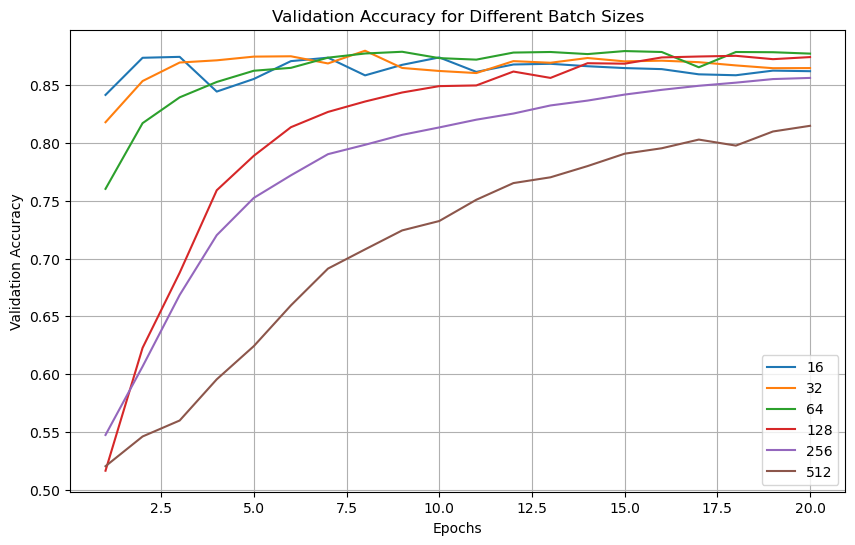

The highest validation accuracy on last epoch is: 64


In [30]:
epochs = range(1, 21)
plt.figure(figsize=(10, 6))
result = []
for i, batch_size in enumerate(batch_sizes):
    plt.plot(epochs, val_results[i], label=str(batch_size))
    result.append((batch_size, val_results[i][-1]))
plt.title('Validation Accuracy for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f'The highest validation accuracy on last epoch is: {max(result, key = lambda k: k[1])[0]}')

In [31]:
# we will use batch size 128 and binary cross entropy
# this is to find the optimal optimizer
# here I will use the binary cross entropy loss function because it performed the best in previous experiment
# we want to compare the different batch sizes
optimizers = ['sgd', 'rmsprop', 'adam', 'adamax', 'adadelta']
val_results = []
for i in optimizers:
    model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                                 keras.layers.Dense(16, activation='relu'), 
                                 keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer=i, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=128, validation_data = (x_val, y_val))
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    val_results.append(val_acc_values)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5112 - loss: 0.6919 - val_accuracy: 0.6445 - val_loss: 0.6748
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6782 - loss: 0.6615 - val_accuracy: 0.7503 - val_loss: 0.6188
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7741 - loss: 0.5966 - val_accuracy: 0.7878 - val_loss: 0.5518
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8027 - loss: 0.5288 - val_accuracy: 0.8124 - val_loss: 0.4865
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8309 - loss: 0.4614 - val_accuracy: 0.8280 - val_loss: 0.4355
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8457 - loss: 0.4108 - val_accuracy: 0.8384 - val_loss: 0.3988
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.3721 - val_accuracy: 0.8346 - val_loss: 0.3887
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8598 - loss: 0.3514 - val_accuracy: 0.

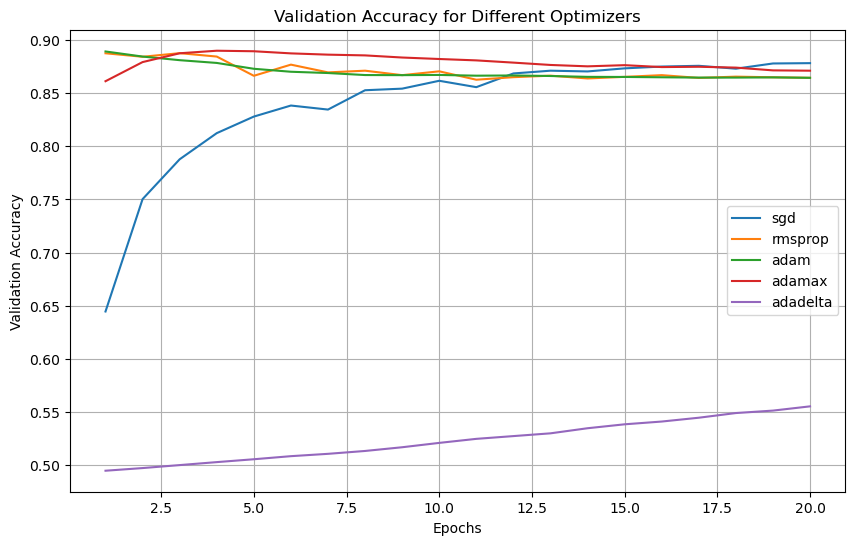

The highest validation accuracy on last epoch is: sgd


In [32]:
epochs = range(1, 21)
plt.figure(figsize=(10, 6))
result = []
for i, optimizer in enumerate(optimizers):
    plt.plot(epochs, val_results[i], label=str(optimizer))
    result.append((optimizer, val_results[i][-1]))

plt.title('Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f'The highest validation accuracy on last epoch is: {max(result, key = lambda k: k[1])[0]}')

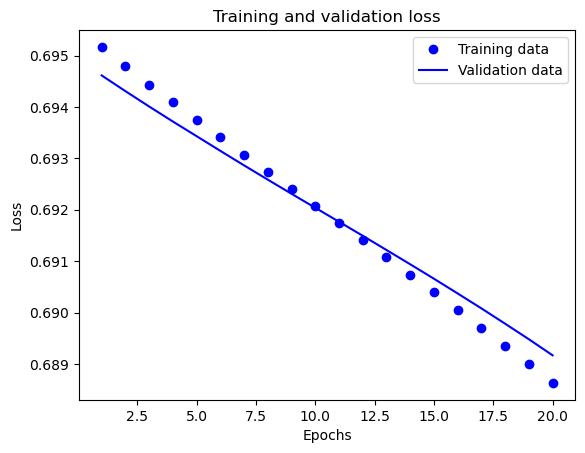

In [33]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training data')
plt.plot(epochs, val_loss_values, 'b', label='Validation data')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
# this model tahes the hyperparameters that performed the best in the previous experiments
model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                             keras.layers.Dense(16, activation = 'relu'),
                             keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=128, validation_data = (x_val, y_val))
loss, accuracy = model.evaluate(x_test, y_test)
print(f'\n\nThe final accuracy: {accuracy}') 

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5091 - loss: 0.6928 - val_accuracy: 0.5847 - val_loss: 0.6871
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6236 - loss: 0.6815 - val_accuracy: 0.6887 - val_loss: 0.6587
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7258 - loss: 0.6473 - val_accuracy: 0.7564 - val_loss: 0.6143
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.5974 - val_accuracy: 0.7963 - val_loss: 0.5590
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8116 - loss: 0.5383 - val_accuracy: 0.8056 - val_loss: 0.5027
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8285 - loss: 0.4755 - val_accuracy: 0.8239 - val_loss: 0.4524
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.4278 - val_accuracy: 0.8360 - val_loss: 0.4121
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8586 - loss: 0.3853 - val_accuracy: 0.

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5614 - loss: 0.6882 - val_accuracy: 0.6592 - val_loss: 0.6675
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7023 - loss: 0.6514 - val_accuracy: 0.7603 - val_loss: 0.6093
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.5860 - val_accuracy: 0.7915 - val_loss: 0.5423
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8188 - loss: 0.5139 - val_accuracy: 0.8182 - val_loss: 0.4785
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.4503 - val_accuracy: 0.8307 - val_loss: 0.4301
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8505 - loss: 0.4024 - val_accuracy: 0.8421 - val_loss: 0.3947
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.3675 - val_accuracy: 0.8502 - val_loss: 0.3699
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.3367 - val_accuracy: 0.

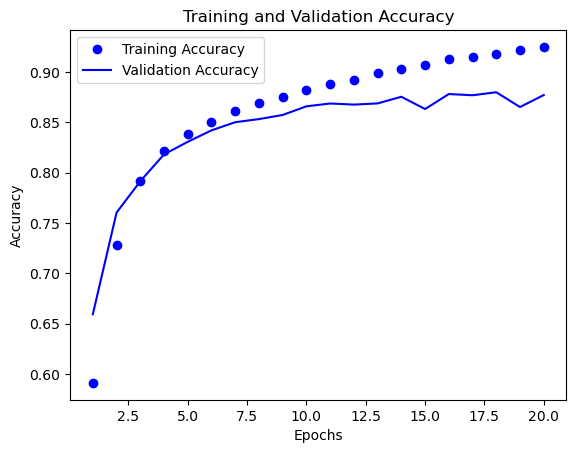

In [35]:
model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                             keras.layers.Dense(16, activation='relu'), 
                             keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()